In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

数据来源CDNOW网站的用户购买明细。包括用户ID，购买日期，购买数量，购买金额。完成数据分析报告

In [26]:
#使用notebook画图必备语句，别问为什么
%matplotlib inline

In [27]:
plt.style.use('ggplot')

加载数据（txt），用read_csv打开(read_table会报警告，原因吗，嘿嘿，不清楚)，用\s+匹配空白字符

In [28]:
df = pd.read_csv('CDNOW.txt', 
                   names = ['User_ID', 'Oder_DT',
                            'Oder_PD', 'Oder_AT'],
                   sep = '\s+')

In [29]:
df.head()

,User_ID,Oder_DT,Oder_PD,Oder_AT
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76


Oder_DT:购买时间。User_ID在1月12号买了两次（女性无疑了，嘿嘿）

In [30]:
df.describe()  #我们来瞧瞧数据特征

,User_ID,Oder_DT,Oder_PD,Oder_AT
count,69659.000000,6.965900e+04,69659.000000,69659.000000
mean,11470.854592,1.997228e+07,2.410040,35.893648
std,6819.904848,3.837735e+03,2.333924,36.281942
min,1.000000,1.997010e+07,1.000000,0.000000
25%,5506.000000,1.997022e+07,1.000000,14.490000
50%,11410.000000,1.997042e+07,2.000000,25.980000
75%,17273.000000,1.997111e+07,3.000000,43.700000
max,23570.000000,1.998063e+07,99.000000,1286.010000


In [31]:
df.info() #看看有没有缺失值（没有）

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
User_ID    69659 non-null int64
Oder_DT    69659 non-null int64
Oder_PD    69659 non-null int64
Oder_AT    69659 non-null float64
dtypes: float64(1), int64(3)
memory usage: 2.1 MB


把Oder_DT转换一下

In [32]:
df['Oder_DT'] = pd.to_datetime(df.Oder_DT, format = "%Y%m%d")  #转成1999-12-01这种形式
df['month'] = df.Oder_DT.values.astype('datetime64[M]')  #按月份分析

In [33]:
df.head()

,User_ID,Oder_DT,Oder_PD,Oder_AT,month
0,1,1997-01-01,1,11.77,1997-01-01
1,2,1997-01-12,1,12.00,1997-01-01
2,2,1997-01-12,5,77.00,1997-01-01
3,3,1997-01-02,2,20.76,1997-01-01
4,3,1997-03-30,2,20.76,1997-03-01


换成每位用户的消费信息

In [34]:
User_grouped = df.groupby('User_ID').sum()
User_grouped.head()

,Oder_PD,Oder_AT
User_ID,,
1,1,11.77
2,6,89.00
3,16,156.46
4,7,100.50
5,29,385.61


In [35]:
User_grouped.describe()

,Oder_PD,Oder_AT
count,23570.000000,23570.000000
mean,7.122656,106.080426
std,16.983531,240.925195
min,1.000000,0.000000
25%,1.000000,19.970000
50%,3.000000,43.395000
75%,7.000000,106.475000
max,1033.000000,13990.930000


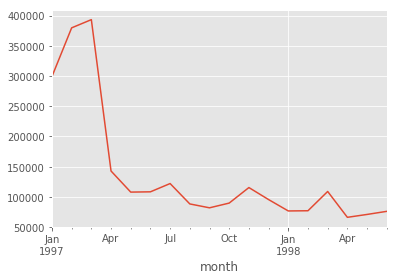

In [38]:
df.groupby('month').Oder_AT.sum().plot()

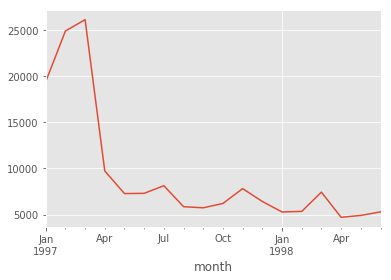

In [40]:
df.groupby('month').Oder_PD.sum().plot()

第一季度销量（销售金额）最多，后面平稳下降，鬼知道什么原因

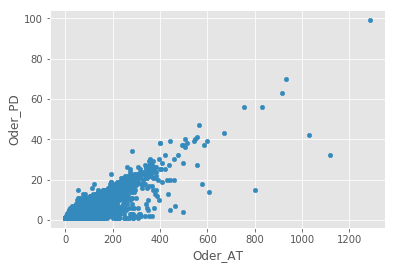

In [41]:
df.plot.scatter(x = 'Oder_AT', y = 'Oder_PD')

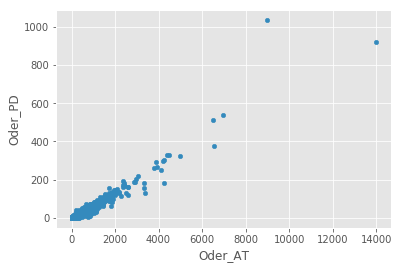

In [43]:
df.groupby('User_ID').sum().plot.scatter(x = 'Oder_AT', y = 'Oder_PD')

In [44]:
df.groupby('User_ID').month.min().value_counts()

1997-02-01    8476
1997-01-01    7846
1997-03-01    7248
Name: month, dtype: int64

In [45]:
df.groupby('User_ID').month.max().value_counts()

1997-02-01    4912
1997-03-01    4478
1997-01-01    4192
1998-06-01    1506
1998-05-01    1042
1998-03-01     993
1998-04-01     769
1997-04-01     677
1997-12-01     620
1997-11-01     609
1998-02-01     550
1998-01-01     514
1997-06-01     499
1997-07-01     493
1997-05-01     480
1997-10-01     455
1997-09-01     397
1997-08-01     384
Name: month, dtype: int64

In [49]:
pivot_AT = df.pivot_table(index = 'User_ID', columns = 'month',
                       values = 'Oder_DT', aggfunc = 'count').fillna(0)
columns_month = df.month.sort_values().astype('str').unique()
pivot_AT.columns = columns_month

In [50]:
pivot_AT.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
User_ID,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0


In [53]:
pivot_PD = pivot_AT.applymap(lambda x : 1 if x > 0 else 0)
pivot_PD.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
User_ID,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
5,1,1,0,1,1,1,1,0,1,0,0,1,1,0,0,0,0,0
